**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Importing required libraries**

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


**Impoting some more required libraries**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Loading the data**

In [8]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Finding the number of rows and columns
df.shape

(891, 12)

**Data Preprocessing**

In [11]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [13]:
# for age we can use the mean age to fill in the missing values
df.Age = df.Age.fillna(df.Age.mean())
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
df.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [15]:
# map sex to numbers: male: 1 and female: 2
df['Sex_1'] = df.Sex.map({'male':1, 'female':2})
df.Sex_1

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Sex_1, Length: 891, dtype: int64

In [16]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [17]:
df.Age


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [18]:
df['Age_1'] = df.Age.astype(int)
df.Age_1

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age_1, Length: 891, dtype: int32

In [19]:
# defining the independent and dependent variables
# droping columns with missing values, and irrelevant data
X = df.drop(['PassengerId','Survived','Sex','Age','Parch','Name','SibSp','Embarked', 'Cabin', 'Ticket'], axis = 'columns')
y = df['Survived']

In [20]:
X

,Pclass,Fare,Sex_1,Age_1
0,3,7.2500,1,22
1,1,71.2833,2,38
2,3,7.9250,2,26
3,1,53.1000,2,35
4,3,8.0500,1,35
...,...,...,...,...
886,2,13.0000,1,27
887,1,30.0000,2,19
888,3,23.4500,2,29
889,1,30.0000,1,26


In [21]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
X

,Pclass,Fare,Sex_1,Age_1
0,3,7.2500,1,22
1,1,71.2833,2,38
2,3,7.9250,2,26
3,1,53.1000,2,35
4,3,8.0500,1,35
...,...,...,...,...
886,2,13.0000,1,27
887,1,30.0000,2,19
888,3,23.4500,2,29
889,1,30.0000,1,26


**Split the data into train and test splits.**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 42)

**Create a Decision Tree Model**

In [26]:
model = DecisionTreeClassifier(random_state= 42)

**Train the Model**

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred = model.predict(X_test)

**Evaluate model**

In [31]:
# confusion and accuracy of model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[130  27]
 [ 37  74]]

Accuracy: 0.7611940298507462


In [32]:
model.score(X_test, y_test)

0.7611940298507462

In [33]:
len(X_train)

623

In [34]:
len(X_test)

268

In [35]:
len(y_train)

623

In [36]:
len(y_test)

268

In [37]:
# Predict if someone that has Pclass:2, fare: 30000, a female (2), and age 30, 1 denotes survive and 0 denotes didn't survive
input_data = pd.DataFrame([[2,30000,2,30]], columns = ['Pclass','Fare', 'Sex_1', 'Age_1'])
input_data_pred = model.predict(input_data)
print(input_data_pred)

[1]


In [38]:
# Predict if someone that has Pclass: 1, fare: 50000, a male (1), and age 50, 1 denotes survive and 0 denotes didn't survive
input_data = pd.DataFrame([[1,50000,1,50,]], columns = ['Pclass','Fare', 'Sex_1', 'Age_1'])
input_data_pred = model.predict(input_data)
print(input_data_pred)

[1]


In [39]:
# Predict if someone that has Pclass: 3, fare: 5000 is a male (1) and age 70, 1 denotes survive and 0 denotes didn't survive
input_data = pd.DataFrame([[3,5000, 1,70]], columns = ['Pclass','Fare', 'Sex_1', 'Age_1'])
input_data_pred = model.predict(input_data)
print(input_data_pred)

[1]


In [40]:
# Predict if someone that has pclass:3, fare: 15000, is a female (2), and age 18, 1 denotes survive and 0 denotes didn't survive
input_data = pd.DataFrame([[3,15000, 2,18]], columns = ['Pclass','Fare', 'Sex_1', 'Age_1'])
input_data_pred = model.predict(input_data)
print(input_data_pred)

[0]


In [41]:
# Predict if someone that has pclass:3, fare: 72500, is a male (1), and age 22, 1 denotes survive and 0 denotes didn't survive
input_data = pd.DataFrame([[3,72500, 2,50]], columns = ['Pclass','Fare', 'Sex_1', 'Age_1'])
input_data_pred = model.predict(input_data)
print(input_data_pred)

[0]


In [42]:
# Predict if someone that has pclass:3, fare: 72500, is a male (1), and age 22, 1 denotes survive and 0 denotes didn't survive
input_data = pd.DataFrame([[3,80500, 1,35]], columns = ['Pclass','Fare', 'Sex_1', 'Age_1'])
input_data_pred = model.predict(input_data)
print(input_data_pred)

[1]


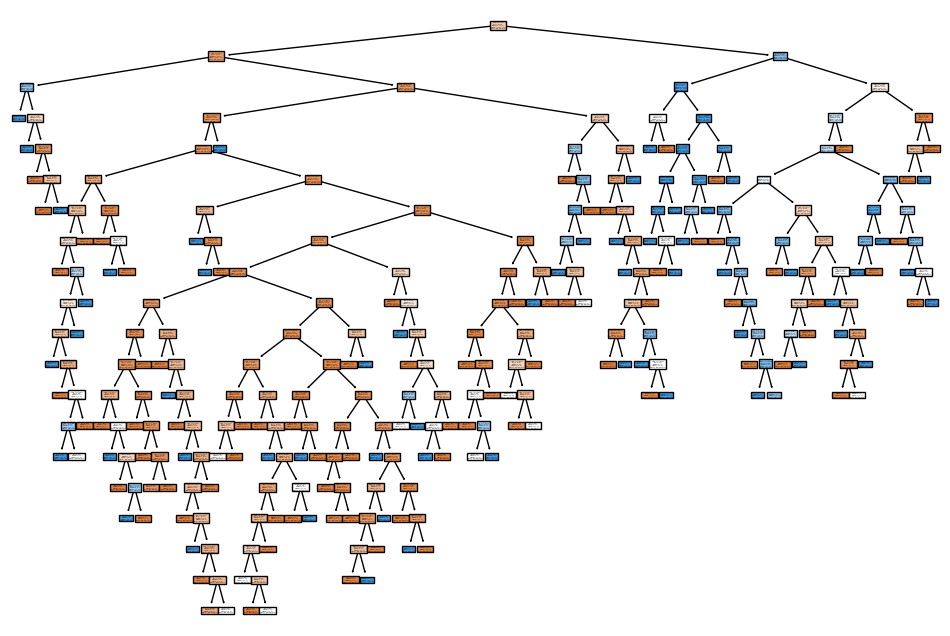

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [44]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[130  27]
 [ 37  74]]

Accuracy: 0.7611940298507462


****Data Analysis****

        Did Not Survive  Survived
Sex                              
female               81       233
male                468       109


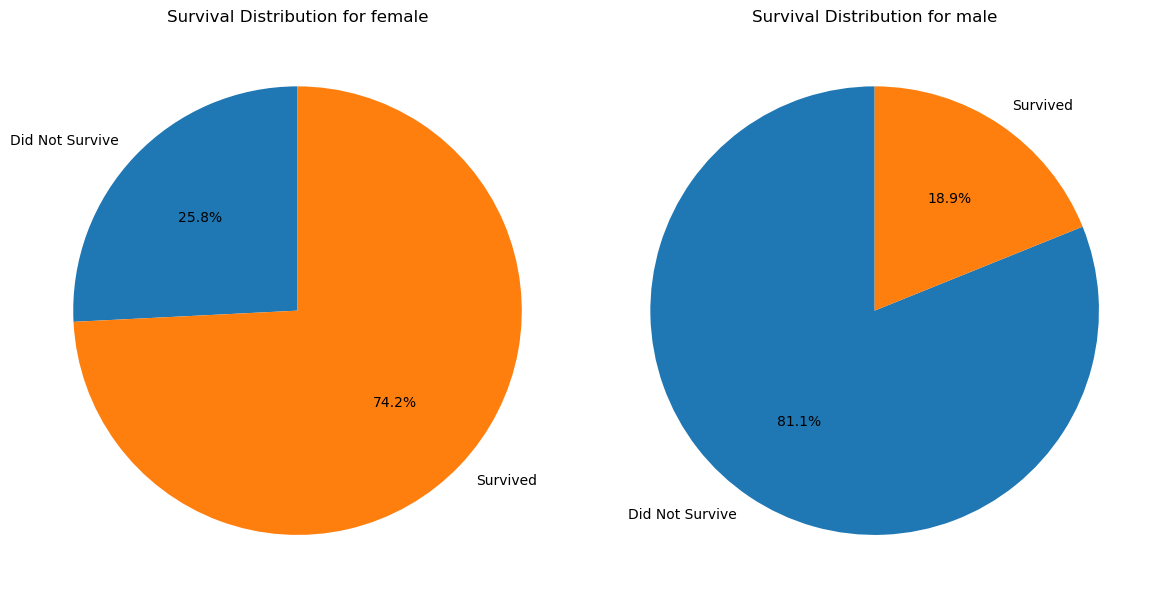

In [46]:
# Group by 'Sex' and 'Survived' and count the occurrences
survival_counts = df.groupby([df.Sex, df.Survived]).size().unstack(fill_value=0)

# Rename the columns for clarity
survival_counts.columns = ['Did Not Survive', 'Survived']

# Display the result
print(survival_counts)# Plotting pie charts for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, (gender, counts) in zip(axes, survival_counts.iterrows()):
    ax.pie(counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Survival Distribution for {gender}') 
plt.tight_layout()
plt.show()

        Did Not Survive  Survived
Pclass                           
1                    80       136
2                    97        87
3                   372       119


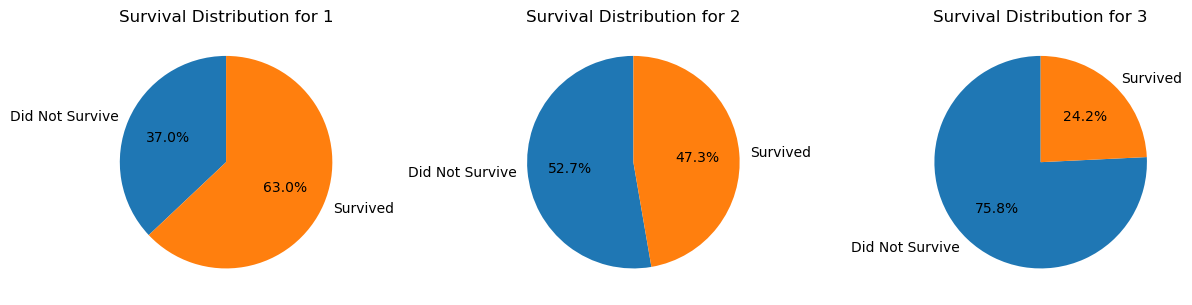

In [47]:
# Group by 'Pclass' and 'Survived' and count the occurrences
survival_counts = df.groupby([df.Pclass, df.Survived]).size().unstack(fill_value=0)

# Rename the columns for clarity
survival_counts.columns = ['Did Not Survive', 'Survived']

# Display the result
print(survival_counts)# Plotting pie charts for each gender
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for ax, (Pclass, counts) in zip(axes, survival_counts.iterrows()):
    ax.pie(counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Survival Distribution for {Pclass}') 
plt.tight_layout()
plt.show()

In [48]:
# Create age bins (0-9, 10-19, ..., 80-89, 90+)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # 11 edges create 10 intervals
labels = [f'{i}-{i+9}' for i in range(0, 90, 10)] + ['90+']  # 10 labels for intervals and 1 for 90+

# Use right=True to include the right edge of the bins
df['Age Group'] = pd.cut(df['Age'].fillna(-1), bins=bins, labels=labels, right=False)

# Map Survived values to 0 (Died) and 1 (Survived)
df['Survived'] = df['Survived'].map({0: 'Died', 1: 'Survived'})

# Group by 'Age Group' and 'Survived', then count the occurrences
survival_counts = df.groupby(['Age Group', 'Survived']).size().unstack(fill_value=0)

# Display the result
print(survival_counts)                              

Survived   Died  Survived
Age Group                
0-9          24        38
10-19        61        41
20-29       268       129
30-39        94        73
40-49        55        34
50-59        28        20
60-69        13         6
70-79         6         0
80-89         0         1
90+           0         0


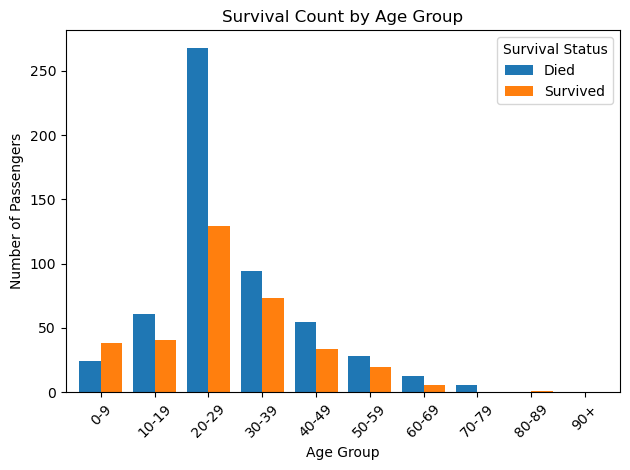

In [49]:
# Plotting the bar chart
survival_counts.plot(kind='bar', width=0.8)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Survival Status', labels=['Died', 'Survived'])
plt.tight_layout()
plt.show()

Survived       Died  Survived
Pclass Sex                   
1      female     3        91
       male      77        45
2      female     6        70
       male      91        17
3      female    72        72
       male     300        47


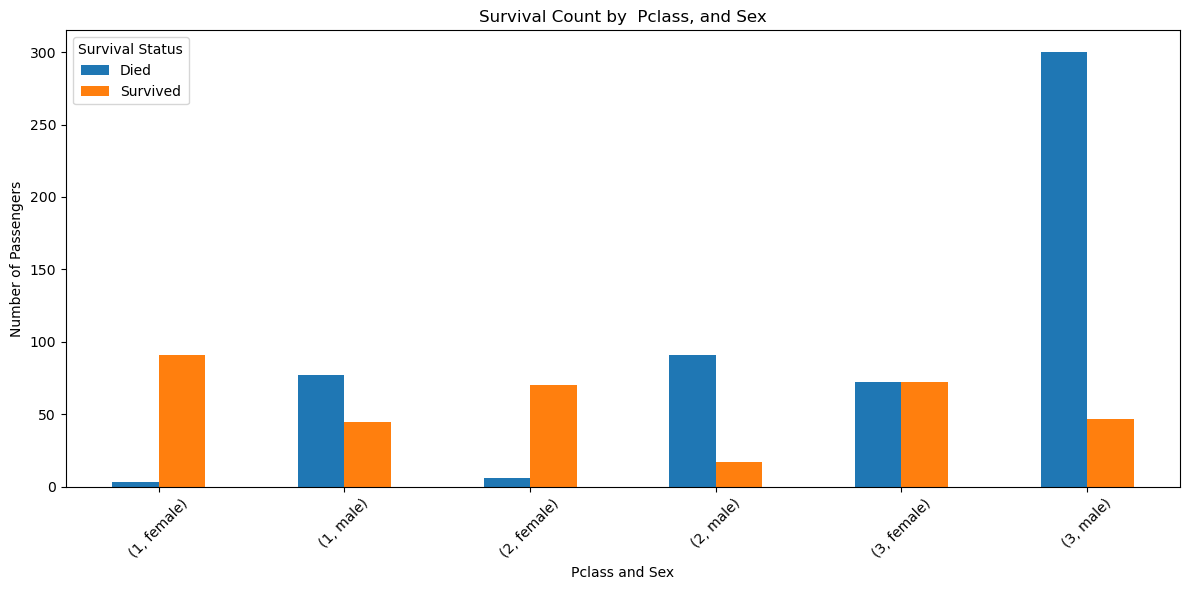

In [50]:
# Group by 'Pclass', 'Sex', 'Age Group', and 'Survived', then count occurrences
survival_counts = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)
print(survival_counts)

# Plotting the bar chart
survival_counts.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Survival Count by  Pclass, and Sex')
plt.xlabel('Pclass and Sex')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Survival Status', labels=['Died', 'Survived'])
plt.tight_layout()
plt.show()